In [27]:
import cudf
import numpy as np
import matplotlib.pyplot as plt
from cuml.linear_model import LogisticRegression
from cuml.model_selection import train_test_split
import pickle
from cuml.metrics import accuracy_score, confusion_matrix
from cuml.common.device_selection import get_global_device_type
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = cudf.read_csv("fashion-mnist_test.csv")

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(10000, 785)

In [6]:
label_type = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [8]:
not_regularized_model = LogisticRegression(solver="qn", penalty='none', max_iter=10000)
l2_regularized_model = LogisticRegression(solver="qn", penalty='l2',  max_iter=10000)

In [9]:
X = df[df.columns[1:]]
Y = df['label']

In [14]:
def display_data(index: int):
    print("Actual label:", label_type[Y.loc[index]])
    plt.imshow(X.loc[index].values.reshape(28,28).get())

Actual label: Pullover


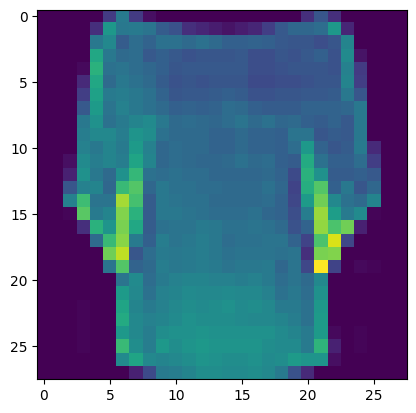

In [15]:
display_data(5)

In [16]:
X = X / 255.

In [17]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [18]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=1000)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=1000)

In [20]:
X_train.shape, Y_train.shape

((8000, 784), (8000,))

In [21]:
X_validate.shape, Y_validate.shape

((1000, 784), (1000,))

In [22]:
X_test.shape, Y_test.shape

((1000, 784), (1000,))

In [31]:
not_regularized_estimator = not_regularized_model.fit(X_train, Y_train)

In [32]:
pickle.dump(not_regularized_estimator, open("not_regularized_estimator_8k.bin", "wb"))

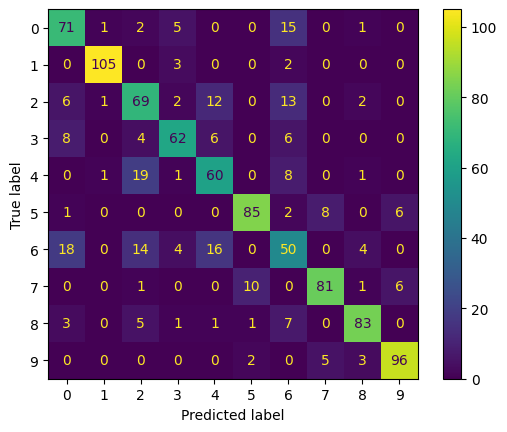

In [35]:
Y_pred = not_regularized_estimator.predict(X_validate)
cm = confusion_matrix(Y_validate, Y_pred).get()
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_type.keys())
cm_display.plot()